In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.collections import PathCollection
from matplotlib.legend import Legend
from ripser import ripser
#from gudhi import SimplexTree
from persim import plot_diagrams
from tqdm import tqdm

# from yao_utils import *
from atlas_general import atlas_general, load_atlas
from yao_utils_otra import find_closest_theta_phi_brute

# data_dir = "data/klein_synthetic"

# # Create atlas-graph representation
# patches_pos = np.load(data_dir+"/patches_pos_razor_big.npy")
# patches_neg = np.load(data_dir+"/patches_neg_razor_big.npy")

# vecs_pos = []
# vecs_neg = []
# for j in range(patches_pos.shape[0]):
#     vecs_pos.append(patches_pos[j, :, :].reshape(9))
#     vecs_neg.append(patches_neg[j, :, :].reshape(9))
# Vecs_pos = np.vstack(vecs_pos)
# Vecs_neg = np.vstack(vecs_neg)

# ka = klein_atlas(Vecs_pos, Vecs_neg, dist=1.0,
#             kernel_fun=lambda x: 1.0)

ka = load_atlas("random_klein", 2, 9)
# ka = load_atlas("random_atlas", 2, 3)

Computing brute matrix...


100%|█████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 330.21it/s]


Done


In [2]:
for j in range(ka.n_charts):
    x_0, L, M, h_mat, A, b, c = ka.chart_dict[j]
    s, _ = np.linalg.eigh(A)
    print(s)

[2.46210642e-01 2.53458958e-01 3.68351029e+00 7.41716555e+00
 3.33521076e+01 2.53840954e+09 3.91691814e+09 5.15538890e+09
 5.17672016e+09]
[3.95858987e-01 5.48223241e-01 1.35097935e+00 2.54390377e+01
 1.90448719e+02 2.09896940e+09 3.47846138e+09 4.25305668e+09
 4.38631754e+09]
[2.43731191e-01 3.88064144e-01 5.97602834e+00 1.24810516e+01
 2.06204653e+01 1.91280456e+09 3.59915178e+09 4.25447348e+09
 4.55513534e+09]
[2.44612507e-01 7.31329428e-01 7.03849197e+00 1.58567586e+01
 8.18476397e+01 1.96954250e+09 5.21936072e+09 5.53122040e+09
 5.98638351e+09]
[5.18813584e-01 6.96913676e-01 2.13602737e+01 4.54202435e+01
 6.85574331e+02 1.42307544e+09 3.84339108e+09 3.90991267e+09
 4.32826591e+09]
[1.21535379e-01 4.04427150e-01 4.04366771e+00 1.32946291e+01
 1.50984569e+02 5.13364747e+09 8.19137927e+09 1.14442041e+10
 1.26536438e+10]
[3.54017175e-01 4.40654919e-01 7.07669751e+00 3.54598278e+01
 9.82628858e+01 1.08115507e+09 2.75334718e+09 2.92072253e+09
 3.28799755e+09]
[2.12882080e-01 3.39058392e

In [3]:
# Sample points from charts
# THE FOLLOWING IS GOOD FOR GETTING SALIENT H1 features
pts_per_chart = 60

# X_pre = []
# start = time()
# for j_theta in tqdm(range(ka.n_flags)):
#     for j_phi in range(ka.n_flags):
#         chart = (j_theta, j_phi)
#         rad = ka.rad_dict[chart]
#         boundary_fun = ka.boundary_fun_dict[chart]
#         for j_per in range(pts_per_chart):
#             cond = True
#             while cond:
#                 xi = rad * np.random.randn(2)
#                 f = boundary_fun(xi)
#                 #if np.linalg.norm(xi) <= rad:
#                 if f < 0:
#                     cond = False
#             x = ka.xi_chart_to_ambient(xi, chart)
#             X_pre.append(x)
# print("Time elapsed: "+str(time() - start))

k = 64
zeros_xi = np.zeros(2)
for j in range(k):
    boundary_fun = ka.boundary_fun_dict[j]
    b_val = boundary_fun(zeros_xi)
    print(b_val)

X_pre = []
thetas_list = []
phis_list = []
for j in tqdm(range(k)):
    X_big = ka.sample_uniformly_from_chart_by_ind(j)
    n_big, _ = X_big.shape
    inds_smol = np.random.choice(n_big, pts_per_chart, replace=False)
    X_smol = X_big[inds_smol, :]
    if np.prod(X_smol.shape) != 0:
        X_pre.append(X_smol)

    thetas = []
    phis = []
    for j in range(pts_per_chart):
        x = X_smol[j, :]
        theta, phi = find_closest_theta_phi_brute(x)
        thetas.append(theta)
        phis.append(phi)
    thetas_list.append(thetas)
    phis_list.append(phis)

X = np.vstack(X_pre)

-0.9610837037298126
-0.7775462479917223
-0.9318847300049811
-0.8594486708243494
-0.8370474815537818
-0.7769792015711801
-0.7950464027647968
-0.9625904730974071
-0.7601900250588187
-0.8505227363980907
-0.9108744284448562
-0.9528702587065823
-0.8139920031746897
-0.7300777743989784
-0.7236347870964437
-0.7516497145118137
-0.9537050756423469
-0.8300206388469178
-0.7911042507262209
-0.9743353619151094
-0.8265899499107263
-0.885445170643834
-0.8499402578790978
-0.9015982760142833
-0.7847479137579967
-0.8713943740924606
-0.7158293460078653
-0.8241757400871847
-0.8148114644909583
-0.8170270331786469
-0.8341339619428254
-0.40428066341098656
-0.7742445199744452
-0.7968915382466548
-0.9588012458219453
-0.9829613773940764
-0.7441331489487197
-0.9830482179813274
-0.8456532101183711
-0.8756084239839765
-0.9352656035200653
-0.7883868612859715
-0.7899208516350882
-0.8386189936195478
-0.830694778611587
-0.8698290908505442
-0.8610107612717002
-0.7837458732878986
-0.936328119519942
-0.9876296054635816
-0

100%|████████████████████████████████████████████████████████████████████████████████| 64/64 [00:02<00:00, 21.51it/s]


In [4]:
# Get polar coordinates for points
thetas = []
phis = []

for j in tqdm(range(X.shape[0])):
    x = X[j, :]
    theta, phi = find_closest_theta_phi_brute(x)
    #theta, phi = find_closest_theta_phi(x)
    thetas.append(theta)
    phis.append(phi)

100%|██████████████████████████████████████████████████████████████████████████| 3840/3840 [00:01<00:00, 2529.27it/s]


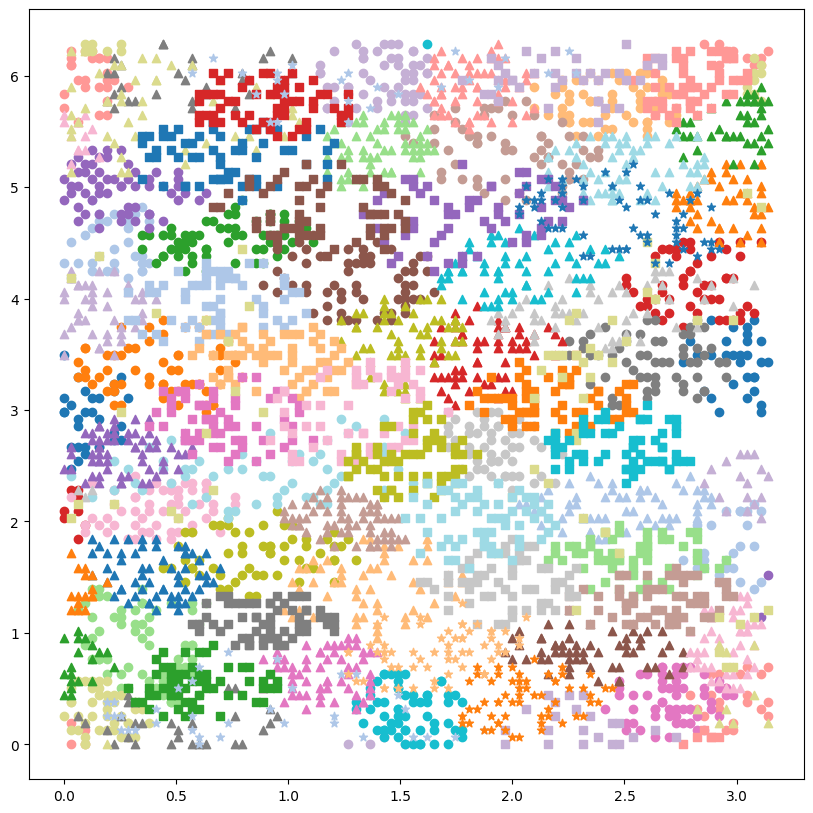

In [6]:
cmap_pre = plt.cm.tab20
n_colors = cmap_pre.N
# extract all colors from the .jet map
cmaplist = [cmap_pre(i) for i in range(cmap_pre.N)]
shaplist = ["o", "^", "s", "*"]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

for kk in range(k):
    thetas = thetas_list[kk]
    phis = phis_list[kk]
    
    color = cmaplist[kk % n_colors]
    shape = shaplist[kk // n_colors]

    ax.scatter(thetas, phis, color=color, marker=shape)

plt.show()

In [ ]:
rips_dict = ripser(X, maxdim=2)
# rips_dict = ripser(X, maxdim=1, do_cocycles=True)

In [ ]:
#plot_diagrams(rips_dict["dgms"])

#plt.show()

for key in rips_dict.keys():
    print(key)
    print(type(rips_dict[key]))
    print("\n")

In [ ]:
dgms = rips_dict["dgms"]
dgms_0 = dgms[0]
dgms_1 = dgms[1]

ccs = rips_dict["cocycles"]
ccs_1 = ccs[1]

lts_1 = []
for birth, death in dgms_1:
    lts_1.append(death - birth)

sorted_inds = list(range(len(lts_1)))
sorted_inds.sort(key=lambda x: lts_1[x],
                reverse=True)

ccs_1_sorted = [ccs_1[ind] for ind in sorted_inds]
dgms_0_sorted = np.array([dgms_0[ind] for ind in sorted_inds])
dgms_1_sorted = np.array([dgms_1[ind] for ind in sorted_inds])
lts_1_sorted = [lts_1[ind] for ind in sorted_inds]

dgms_0_top = dgms_0_sorted[:5]
dgms_1_top = dgms_1_sorted[:5]
ccs_1_top = ccs_1_sorted[:5]

In [ ]:
fig = plt.figure(figsize=(3, 3))
gs_grid_len = 10
gs = GridSpec(gs_grid_len, gs_grid_len)
ax = fig.add_subplot(gs[1:-1, 1:-1])
plot_diagrams(dgms, legend=False)

"""
# Change legend fontsize
ax = plt.gca()
legend = [c for c in ax.get_children() if isinstance(c, Legend)][0]
texts = legend.get_texts()
for text in texts:
    label = text.get_text()
    text.set_text(label)
    text.set_fontsize(12)
"""

# Set title
ax.set_title("Atlas graph of\nKlein bottle")

# Change axis fontsizes
letters = ["x", "y"]
for let in letters:
    label = getattr(ax, "get_"+let+"label")()
    getattr(ax, "set_"+let+"label")(label, fontsize=12)
    ticks = getattr(ax, "get_"+let+"ticks")()
    getattr(ax, "set_"+let+"ticklabels")([str(tick) for tick in ticks], fontsize=12)

# Draw border of dots
path_collections = [item for item in ax.get_children() if isinstance(item, PathCollection)]
for pc in path_collections:
    pc.set_edgecolor("k")
    
fig = plt.gcf()
fig.savefig("graphics/h2_atlas_naive.jpg")

plt.show()

In [ ]:
plot_diagrams([dgms_0_top, dgms_1_top])

plt.show()

In [ ]:
print(ccs_1_top)
print(type(ccs_1_top))
print(len(ccs_1_top))
print(type(ccs_1_top[0]))
print(ccs_1_top[0].shape)

In [ ]:
def draw_feature(arr):
    theta_list = []
    phi_list = []
    for row in arr:
        for ind in row:
            theta = thetas[ind]
            phi = phis[ind]
            theta_list.append(theta)
            phi_list.append(phi)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot()
    ax.scatter(theta_list, phi_list)
    
    plt.show()

In [ ]:
draw_feature(ccs_1_top[0])

In [ ]:
# Sample points from charts
# THE FOLLOWING IS GOOD FOR GETTING SALIENT H2 feature
pts_per_chart = 10

X_pre = []
start = time()
for j_theta in range(ka.n_flags):
    for j_phi in range(ka.n_flags):
        chart = (j_theta, j_phi)
        rad = ka.rad_dict[chart]
        boundary_fun = ka.boundary_fun_dict[chart]
        for j_per in range(pts_per_chart):
            cond = True
            while cond:
                xi = rad * np.random.randn(2)
                f = boundary_fun(xi)
                #if np.linalg.norm(xi) <= rad:
                if f < 0:
                    cond = False
            x = ka.xi_chart_to_ambient(xi, chart)
            X_pre.append(x)
print("Time elapsed: "+str(time() - start))

X = np.vstack(X_pre)